### 나의 첫 번째 장고 프로젝트

 - 아주 간단한 블로그 사이트를 만들어 보자!
 
 - 그 중 첫번째 단계는 장고 프로젝트를 시작하는 것
 
 - 다시 말하자면 장고의 기본 골격(?)을 만들어주는 스크립트를 실행하난 단계
 
 - 장고에서는 디렉토리와 파일명이 매우 중요하다
 
 - 웹 페이지를 접속할 때 입력하는 주소가 중요한 것과 비슷한 원리!
 
 - 파일명을 마음대로 변경해서도 안되고 다른 곳을 옮겨서도 안된다
 
 - 장고는 이러한 파일과 디렉토리의 특정한 구조를 유지해야 동작할 수 있다
 
 > **NOTE** 모든 작업은 가상환경(virtualenv) 안에서 해야 하는 것을 꼭 기억하세요. 현재 콘솔 창에서 접두어로 (myvenv)가 안 보인다면 먼저 virtualenv를 활성화해야 합니다. Django 설치하기 장에서 virtualenv 작동법에 대해 배웠어요. 윈도우에서는 myvenv\Scripts\activate를 타이핑하고, 맥 OS과 리눅스에서는 source myvenv/bin/activate을 입력하세요.
 
 - 아래와 같은 명령어를 가상환경이 실행 중이 cmd windows에서 동작해보자
 
 - 이때 명령어 뒤의 `.`을 빼먹지 말자!
 
 > Mac/linux : `(myvenv) ~/djangoW$ django-admin startproject mysite .`
 >
 > windows : `(myvenv) C:\Users\Name\djangoW> django-admin.py startproject mysite .`

In [1]:
from IPython.display import Image

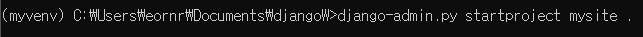

In [2]:
Image("img/01_img.png")

 - `django-admin.py`은 스크립트로 디렉토리와 파일들을 생성한다

 - 명령어를 가상환경 상에서 실행하고 가상환경이 구현되어 있는 디렉토리로 가서 파일들을 확인해보자
 
 - 아래와 같은 디렉토리 구조와 파일들을 확인할 수 있다
 
 ```
 djangoW
├───manage.py
└───mysite
        settings.py
        urls.py
        wsgi.py
        __init__.py
 ```
 
 - 여기서 `manage.py`는 스크립트 파일이며 사이트 관리를 도와주는 역할을 한다
 
 - 이 스크립트로 다른설치 작업 없이 컴퓨터에서 웹 서버를 시작할 수 있다
 
 - 또 `settings.py`는 웹사이트 설정이 있는 파일이다
 
 - `urls.py`는 `urlresolver`가 사용하는 패턴의 목록을 가지고 있다
 
 - 즉, 우편배달부가 어느 곳으로 편지를 전달해야하는지 목록을 가지고 있는 것과 비슷하다
 
 - 여기서 이 파일들을 수정하거나 파일을 다른 곳으로 옮기거나 혹은 삭제를 하면 동작에 문제가 발생한다

### 설정 변경

 - `mysite/setting.py` 파일을 수정하여 설정과 관련된 항목을 하나 변경해보자
 
 - 모두 `sublime text 3`를 사용하여 수정을 진행해보자
 
 - 웹사이트에 정확한 현재 시간을 넣으면 시간이 확인하고자 할 때 도움이 될 것이다
 
 - 이를 위해 위키피디아 타임존 리스트에 가서 해당 시간대(타임존)를 복사하자 (예: Asia/Seoul)
 
 > https://en.wikipedia.org/wiki/List_of_tz_database_time_zones
 
 - `Settings.py`에서 `TIME_ZONE`있는 줄을 찾고 이를 해당 시간대로 변경하자
 
 `TIME_ZONE = 'Asia/Seoul'`
 
 
 - 다음으로 정적 파일 경로를 추가하자
 
 - 정적 파일은 나중에 상세한 설명과 함께 다룰 것이다 (예시 : CSS 파일)
 
 - 파일 끝(end)으로 내려가서, `STATIC_URL`항목 바로 아래에 `STATIC_ROOT`을 추가하자
 
 ``` 
 STATIC_URL = '/static/'
 STATIC_ROOT = os.path.join(BASE_DIR, 'static')
 ```
 
 - 기본적으로 django에서는 localhost를 사용하는 것으로 설정되어있다
 
 - 여기서 `DEBUG`가 `True`이고 `ALLOWED_HOSTS`가 비어 있으면, 호스트는 `['localhost', '127.0.0.1', '[::1]']`에 대해서 유효하다
 
 - 애플리케이션을 배포할 때 PythonAnywhere의 호스트 이름과 일치하지 않으므로 다음 설정을 아래와 같이 변경해줘야 한다
 
 `ALLOWED_HOSTS = ['127.0.0.1', '.pythonanywhere.com']`

###### mtsite/setting.py의 처음 코드들

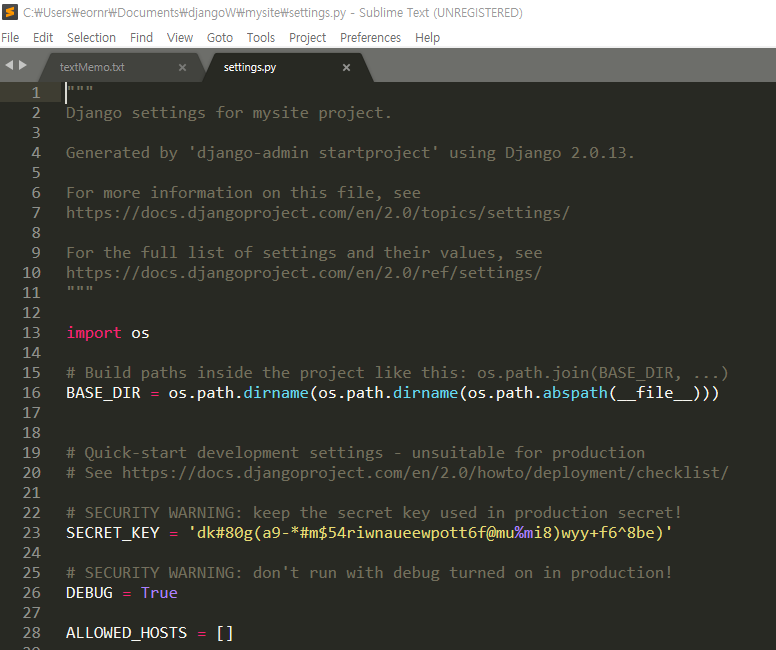

In [4]:
Image("img/02_img.png")

###### TIMEZONE 부분 찾고 수정

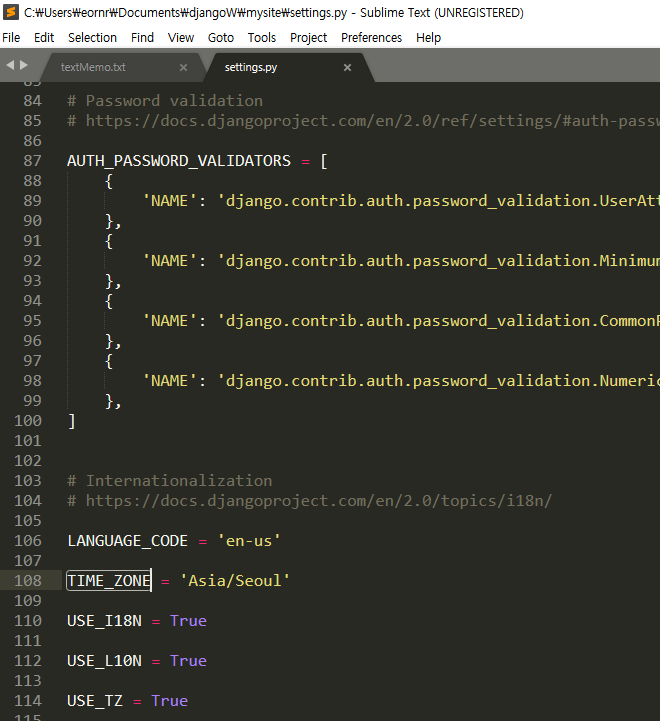

In [5]:
Image("img/03_img.png")

###### 정적 항목 경로 설정

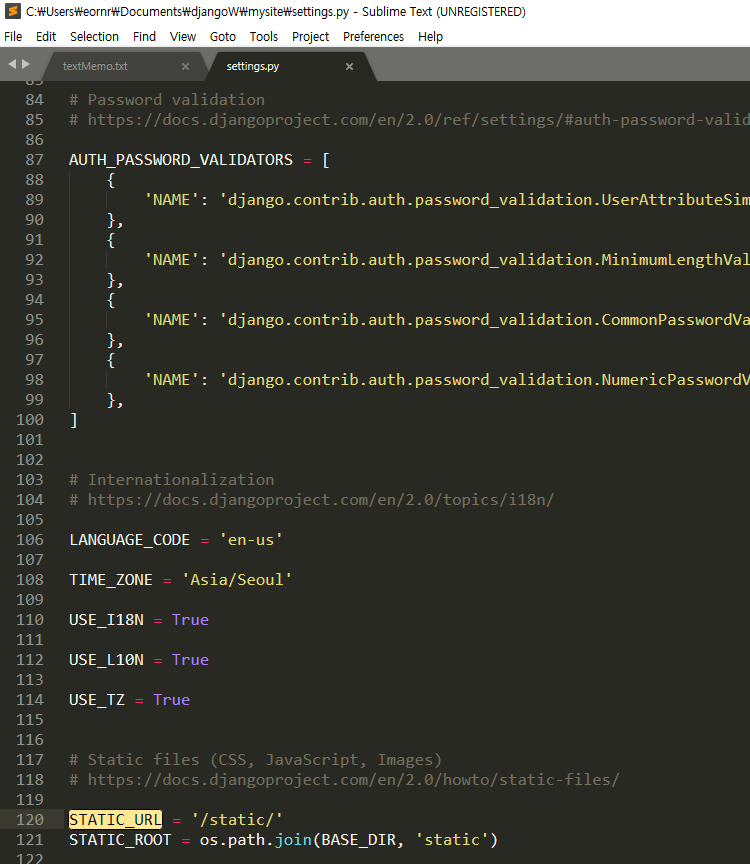

In [6]:
Image("img/04_img.png")

###### 배포를 위한 호스트 관련 설정

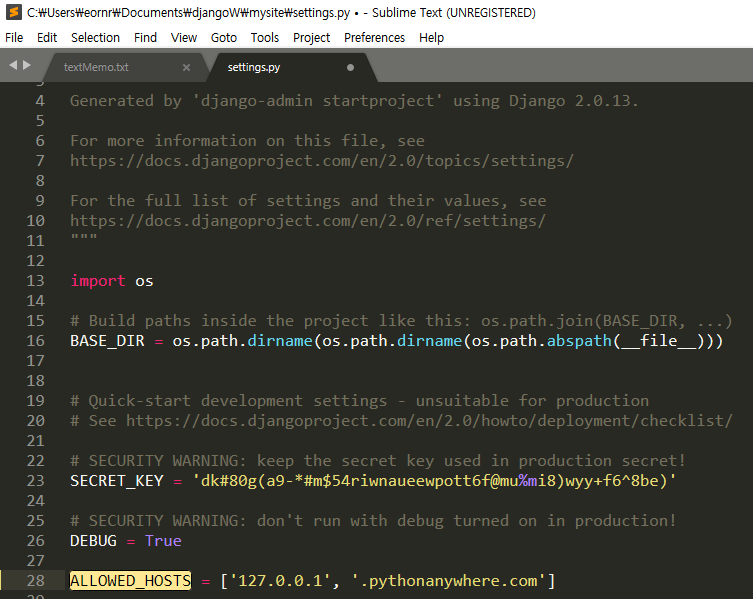

In [7]:
Image("img/05_img.png")

### 데이터베이스 설정하기

 - 데이터베이스는 웹 페이지나 사이트에서 여러 사진들과 파일들 계정에 대한 정보 등등 여러 데이터를 저장하고 효율적으로 관리하기 위한 도구
 
 - 이 데이터베이스라는 도구를 사용할 수 있게하는 여러 소프트웨어가 있는데 그 중 우리는 `sqlite3`를 사용해볼 것이다
 
 - 그리고 이 파일은 이미 `mysite/settings.py` 파일 안에 설치되어 있다
 
 ```
 DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': os.path.join(BASE_DIR, 'db.sqlite3'),
    }
}
 ```
 
 - 우리가 만들 블로그에 데이터 베이스를 생성하기 위해서 콘솔 창에 아래 코드를 실행하자
 
 > `python manage.py migrate` (이 명령을 실행하기 위해서는 `djangoW`디렉터리 안에 있는 `manage.py`가 필요합니다)
 
 - 동작이 설공적으로 되었다면 아래와 같은 내용들을 볼 수 있다
 
 ```
(myvenv) ~/djangogirls$ python manage.py migrate
Operations to perform:
  Apply all migrations: auth, admin, contenttypes, sessions
Running migrations:
  Rendering model states... DONE
  Applying contenttypes.0001_initial... OK
  Applying auth.0001_initial... OK
  Applying admin.0001_initial... OK
  Applying admin.0002_logentry_remove_auto_add... OK
  Applying contenttypes.0002_remove_content_type_name... OK
  Applying auth.0002_alter_permission_name_max_length... OK
  Applying auth.0003_alter_user_email_max_length... OK
  Applying auth.0004_alter_user_username_opts... OK
  Applying auth.0005_alter_user_last_login_null... OK
  Applying auth.0006_require_contenttypes_0002... OK
  Applying auth.0007_alter_validators_add_error_messages... OK
  Applying sessions.0001_initial... OK
 ```